In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/saved_model.pb
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/keras_metadata.pb
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/assets/vocab.txt
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/variables/variables.index
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/variables/variables.data-00000-of-00001
/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-768-a-12/2/saved_model.pb
/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-768-a-12/2/keras_metadata.pb
/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-768-a-12/2/assets/vocab.txt
/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-768-a-12/2/variables/variables.index
/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-768-a-12/2/variables/variables.data-00000-of-00001


In [2]:
#load the data
train_data = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_data = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [3]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

def preprocess_data(data, tokenize, stop_word = True):

  #delete emojis
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  emoji_pattern.sub(r'', data)

  if stop_word:
    preprocessed_data = ' '.join(re.sub("(_[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]",
                         " ",
                           data).split()) # delete URLs, hashtags, numbers etc.

    words = tokenize(preprocessed_data)
    words_list = []
    for token in words:
      if not token.is_stop and len(token) != 1: #remove stop words and only letters

        words_list.append(token.lemma_) #add the lemmatized tokens to list


    preprocessed_data = " ".join(words_list).lower() #make words to lowercase

  else:
    preprocessed_data = ' '.join(re.sub("(_[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)",
                         " ",
                         data).split()) # delete URLs, hashtags etc.

    words = tokenize(preprocessed_data)
    words_list = []
    for token in words:

        words_list.append(str(token)) #add the tokens to list


    preprocessed_data = " ".join(words_list).lower() #make words to lowercase


  return preprocessed_data

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
#preprocess the text column
from sklearn.model_selection import train_test_split

def get_data(path, stop_word = True, mode = "train"):
    data = pd.read_csv(path)
    text_array = data['text'].to_numpy()
    tokenize = spacy.load("en_core_web_sm")
    clean_text_list = []
    for i in text_array:
        clean_text_list.append(preprocess_data(i, tokenize, stop_word=stop_word))
    clean_text = pd.DataFrame(clean_text_list)
    data['text'] = clean_text
    
    if mode == "train":

        X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size = 0.3, random_state=42, stratify = data['target'])
        return list(X_train), list(X_test), list(y_train), list(y_test)
    
    elif mode == "test":
        return list(data['text'])

In [6]:
path = "/kaggle/input/nlp-getting-started/train.csv"

#train-test splits with stopwords
Xs_train, Xs_test, ys_train, ys_test =  get_data(path, stop_word = False)
Xs_test, Xs_val, ys_test, ys_val = train_test_split(Xs_test, ys_test, test_size = 0.5, random_state = 42)

#train-test splits without stopwords
X_train, X_test, y_train, y_test =  get_data(path, stop_word = True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [7]:
print("Train size:", len(X_train))
print("Val size:", len(X_val))
print("Test size:", len(X_test))

print("Train data ratio:", len(X_train)/(len(X_test)+len(X_val)+len(X_train)))
print("Val data ratio:", len(X_val)/(len(X_test)+len(X_val)+len(X_train)))
print("Test data ratio:", len(X_test)/(len(X_test)+len(X_val)+len(X_train)))

Train size: 5329
Val size: 1142
Test size: 1142
Train data ratio: 0.6999868645737554
Val data ratio: 0.1500065677131223
Test data ratio: 0.1500065677131223


# BERT Model

In [8]:
#load BERT preprocessor and encoder
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

preprocessor_path = "/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3"
encoder_path = "/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-768-a-12/2"

bert_preprocessor = hub.KerasLayer(
    preprocessor_path)
bert_encoder =  hub.KerasLayer(
    encoder_path, trainable=False)

In [9]:
#build the model
input_text = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessed_text = bert_preprocessor(input_text)
encoded_text = bert_encoder(preprocessed_text)

l = tf.keras.layers.Dropout(0.2)((encoded_text['pooled_output']))
l = tf.keras.layers.Dense(1024, activation = 'leaky_relu')(l)
l = tf.keras.layers.Dense(1024, activation = 'leaky_relu')(l)
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.Dense(512, activation = 'leaky_relu')(l)
l = tf.keras.layers.Dense(512, activation = 'leaky_relu')(l)
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.Dense(256, activation = 'leaky_relu')(l)
l = tf.keras.layers.Dense(256, activation = 'leaky_relu')(l)
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.Dense(1, activation = 'sigmoid')(l)


model_bert = tf.keras.Model(inputs = [input_text], outputs = [l])

In [10]:
model_bert.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['input_1[0][0]']             
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

In [11]:
#define metrics, optimizer and set a learning rate scheduler
metrics = [
        tf.keras.metrics.BinaryAccuracy(name = "accuracy"),
        tf.keras.metrics.Precision(name = "precision"),
        tf.keras.metrics.Recall(name = "recall")
  ]

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                patience=3, min_lr=1e-8)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 6)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)


model_bert.compile(
        optimizer = optimizer,
        loss = "binary_crossentropy",
        metrics = metrics
    )

In [12]:
#training without stopwords
history = model_bert.fit(X_train,
                  y_train,
                  epochs = 30,
                  batch_size = 32,
                  validation_data=(X_val, y_val),
                  callbacks = [reduce_lr, early_stopping]
                  )

Epoch 1/30
167/167 [==============================] - 56s 256ms/step - loss: 0.5871 - accuracy: 0.6994 - precision: 0.6872 - recall: 0.5515 - val_loss: 0.5222 - val_accuracy: 0.7609 - val_precision: 0.7020 - val_recall: 0.7694 - lr: 0.0010
Epoch 2/30
167/167 [==============================] - 42s 250ms/step - loss: 0.5344 - accuracy: 0.7493 - precision: 0.7516 - recall: 0.6223 - val_loss: 0.4939 - val_accuracy: 0.7776 - val_precision: 0.7864 - val_recall: 0.6612 - lr: 0.0010
Epoch 3/30
167/167 [==============================] - 42s 249ms/step - loss: 0.5276 - accuracy: 0.7579 - precision: 0.7796 - recall: 0.6087 - val_loss: 0.4842 - val_accuracy: 0.7855 - val_precision: 0.8356 - val_recall: 0.6224 - lr: 0.0010
Epoch 4/30
167/167 [==============================] - 42s 250ms/step - loss: 0.5318 - accuracy: 0.7566 - precision: 0.7797 - recall: 0.6044 - val_loss: 0.4913 - val_accuracy: 0.7968 - val_precision: 0.7959 - val_recall: 0.7082 - lr: 0.0010
Epoch 5/30
167/167 [====================

In [13]:
#without stop words and numbers
eval = model_bert.evaluate(X_test, y_test)
f1_score = (2*eval[2]*eval[3])/(eval[2]+eval[3])
print("F1 score is", f1_score)

36/36 [==============================] - 7s 203ms/step - loss: 0.4594 - accuracy: 0.8004 - precision: 0.8215 - recall: 0.6843
F1 score is 0.7466666706367772


In [14]:
#predictions for the test set
y_predicted = model_bert.predict(X_test)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)

y_predicted

36/36 [==============================] - 8s 201ms/step


array([1, 0, 1, ..., 0, 1, 0])

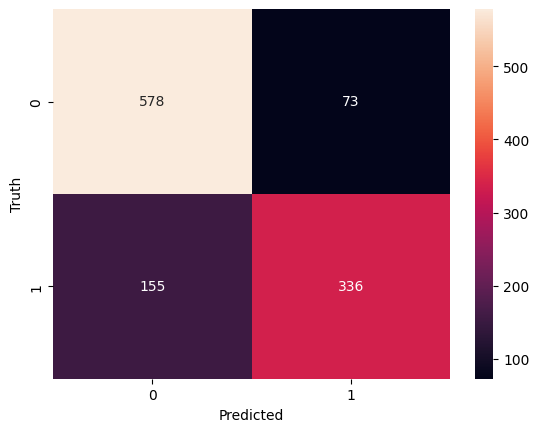

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_predicted) # create confusion matrix

sns.heatmap(cm, annot=True, fmt='d') # plot the confusion matrix
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [16]:
#build the model again for new training
input_text = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessed_text = bert_preprocessor(input_text)
encoded_text = bert_encoder(preprocessed_text)

l = tf.keras.layers.Dropout(0.2)((encoded_text['pooled_output']))
l = tf.keras.layers.Dense(1024, activation = 'leaky_relu')(l)
l = tf.keras.layers.Dense(1024, activation = 'leaky_relu')(l)
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.Dense(512, activation = 'leaky_relu')(l)
l = tf.keras.layers.Dense(512, activation = 'leaky_relu')(l)
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.Dense(256, activation = 'leaky_relu')(l)
l = tf.keras.layers.Dense(256, activation = 'leaky_relu')(l)
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.Dense(1, activation = 'sigmoid')(l)

model_bert_ws = tf.keras.Model(inputs = [input_text], outputs = [l]) #ws: with stopwords

In [17]:
#define metrics, optimizer and set a learning rate scheduler
metrics = [
        tf.keras.metrics.BinaryAccuracy(name = "accuracy"),
        tf.keras.metrics.Precision(name = "precision"),
        tf.keras.metrics.Recall(name = "recall")
  ]

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                patience=3, min_lr=1e-8)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 6)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)


model_bert.compile(
        optimizer = optimizer,
        loss = "binary_crossentropy",
        metrics = metrics
    )

In [18]:
model_bert_ws.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['input_2[0][0]']             
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                              

In [19]:
model_bert_ws.compile(
        optimizer = optimizer,
        loss = "binary_crossentropy",
        metrics = metrics
    )

In [20]:
#train with stopwords
history_ws = history = model_bert_ws.fit(Xs_train,
                  ys_train,
                  epochs = 30,
                  batch_size = 32,
                  validation_data=(Xs_val, ys_val),
                  callbacks = [reduce_lr, early_stopping]
                  )

Epoch 1/30
167/167 [==============================] - 48s 256ms/step - loss: 0.5632 - accuracy: 0.7279 - precision: 0.7220 - recall: 0.5965 - val_loss: 0.5126 - val_accuracy: 0.7697 - val_precision: 0.8900 - val_recall: 0.5286 - lr: 0.0010
Epoch 2/30
167/167 [==============================] - 42s 250ms/step - loss: 0.5102 - accuracy: 0.7696 - precision: 0.7973 - recall: 0.6218 - val_loss: 0.4921 - val_accuracy: 0.7828 - val_precision: 0.8954 - val_recall: 0.5592 - lr: 0.0010
Epoch 3/30
167/167 [==============================] - 42s 250ms/step - loss: 0.4937 - accuracy: 0.7752 - precision: 0.7958 - recall: 0.6415 - val_loss: 0.4644 - val_accuracy: 0.8012 - val_precision: 0.8623 - val_recall: 0.6388 - lr: 0.0010
Epoch 4/30
167/167 [==============================] - 42s 250ms/step - loss: 0.4831 - accuracy: 0.7791 - precision: 0.7918 - recall: 0.6594 - val_loss: 0.4482 - val_accuracy: 0.8047 - val_precision: 0.8432 - val_recall: 0.6694 - lr: 0.0010
Epoch 5/30
167/167 [====================

In [21]:
#evaluate data with stop words and numbers
eval = model_bert_ws.evaluate(Xs_test, ys_test)
f1_score = (2*eval[2]*eval[3])/(eval[2]+eval[3])
print("F1 score is", f1_score)

36/36 [==============================] - 7s 203ms/step - loss: 0.4504 - accuracy: 0.8117 - precision: 0.8209 - recall: 0.7189
F1 score is 0.7665580802049805


In [22]:
#get prediction for the test set
ys_predicted = model_bert_ws.predict(Xs_test)
ys_predicted = ys_predicted.flatten()
ys_predicted = np.where(ys_predicted > 0.5, 1, 0)

ys_predicted

36/36 [==============================] - 8s 201ms/step


array([1, 0, 1, ..., 0, 1, 0])

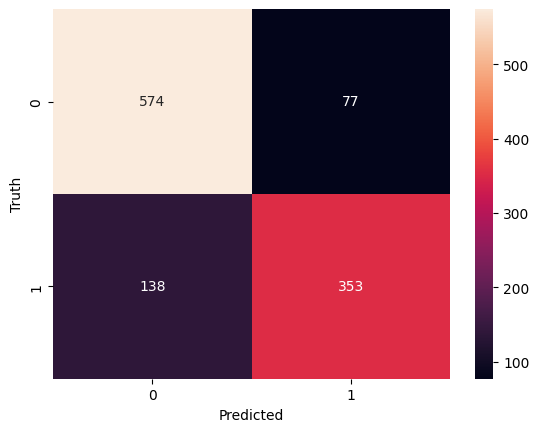

In [23]:
cm = confusion_matrix(ys_test, ys_predicted) # create confusion matrix

sns.heatmap(cm, annot=True, fmt='d') # plot the confusion metrics
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [24]:
#load the test data
test_data_path = "/kaggle/input/nlp-getting-started/test.csv"
data_test = get_data(test_data_path, stop_word = False, mode = "test")

In [25]:
#load the submission file
submission_file_path = "/kaggle/input/nlp-getting-started/sample_submission.csv"
submission = pd.read_csv(submission_file_path)
submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [26]:
#prediction for the test data
predicted = model_bert_ws.predict(data_test)
predicted = predicted.flatten()
predicted = np.where(predicted > 0.5, 1, 0)

predicted

102/102 [==============================] - 20s 201ms/step


array([1, 1, 1, ..., 1, 1, 0])

In [27]:
#put predicted classes to submission file
submission['target'] = predicted
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


In [28]:
#create the submission csv file
submission.to_csv("submission.csv", sep = ",", index = False)